In [108]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np 

# Define the path to the parent folder containing the Px folders
data_folder = 'C:/Users/Carlota/Documents/MovellaBiomechanicsChallenge/data/'

# Define the number of rows and columns for the subplot grid
px_folders = [f for f in os.listdir(data_folder) if f.startswith('P')]
num_rows = len(px_folders)
num_cols = 3


jerk_dict = {}
rms_jerk_dict = {}
rms_acc_dict = {}
rms_vel_dict = {}
rms_pos_dict = {}

for i, folder_name in enumerate(px_folders):
    print(folder_name)
    pkl_folder = os.path.join(data_folder, folder_name, 'PKL')
    for j, file_name in enumerate(os.listdir(pkl_folder)):
        pkl_path = os.path.join(pkl_folder, file_name)
        # Load the data from the PKL file
        with open(pkl_path, 'rb') as f:
            data = pickle.load(f)

        # Run your analysis code on the data
        joint_names = list(data['segmentData'].keys())
        jerk_list, acc_list, vel_list, pos_list = [], [], [], [] 
        
        jerk_dict[file_name.split('.')[0]] = {}
        rms_jerk_dict[file_name.split('.')[0]] = {}
        rms_acc_dict[file_name.split('.')[0]] = {}
        rms_vel_dict[file_name.split('.')[0]] = {}
        rms_pos_dict[file_name.split('.')[0]] = {}
        
        for joint in joint_names:  
            position = data['segmentData'][joint]['position']
            velocity = data['segmentData'][joint]['velocity']
            acceleration = data['segmentData'][joint]['acceleration']
            
            p_mag = np.linalg.norm(position, axis=1)
            v_mag = np.linalg.norm(velocity, axis=1)
            a_mag = np.linalg.norm(acceleration, axis=1)
            jerk = np.diff(a_mag)
            
            jerk_list.append(jerk)
            acc_list.append(a_mag)
            vel_list.append(v_mag)
            pos_list.append(p_mag)
            
            rms_jerk_dict[file_name.split('.')[0]][joint] = {}
            rms_jerk_dict[file_name.split('.')[0]][joint] = np.sqrt(np.mean(np.square(jerk_list)))
            rms_acc_dict[file_name.split('.')[0]][joint] = {}
            rms_acc_dict[file_name.split('.')[0]][joint] = np.sqrt(np.mean(np.square(acc_list)))
            rms_vel_dict[file_name.split('.')[0]][joint] = {}
            rms_vel_dict[file_name.split('.')[0]][joint] = np.sqrt(np.mean(np.square(vel_list)))
            rms_pos_dict[file_name.split('.')[0]][joint] = {}
            rms_pos_dict[file_name.split('.')[0]][joint] = np.sqrt(np.mean(np.square(pos_list)))


P12
P13
P14
P3
P5
P6
P7
P8


KeyError: 0

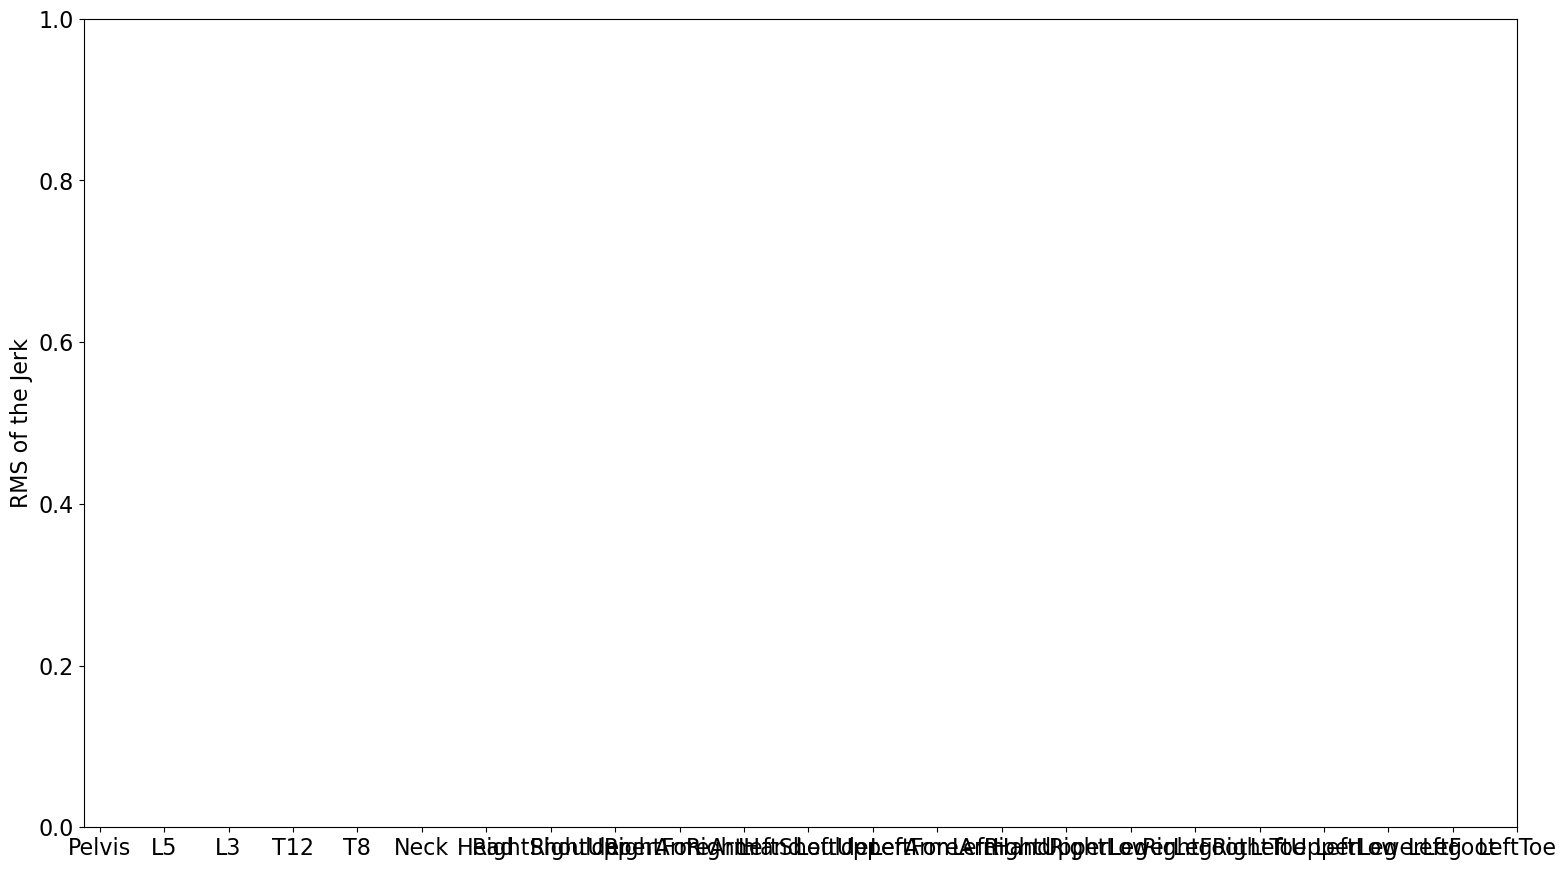

In [141]:
import matplotlib.pyplot as plt

# Set the trial names
trial_names = ['P12_easy', 'P12_medium', 'P12_hard']

# Create a list of colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Create the figure and axes objects
fig, ax = plt.subplots()

# Set the figure size
fig.set_size_inches(18.5, 10.5)

# Set the font size
plt.rcParams.update({'font.size': 16})

# Set the x-axis labels
ax.set_xticks([x + 0.25 for x in range(len(joint_names))])
ax.set_xticklabels(joint_names)

# Set the y-axis label
ax.set_ylabel('RMS of the Jerk')

# Loop over the trials and plot the bars
for i in range(len(trial_names)):
    trial_data = [rms_jerk_dict[i][joint] for joint in joint_names]
    ax.bar([x + i*0.25 for x in range(len(joint_names))], trial_data, width=0.25, color=colors[i], align='center')

# Add a legend
ax.legend(trial_names)

# Show the plot
plt.show()


## Plot position 

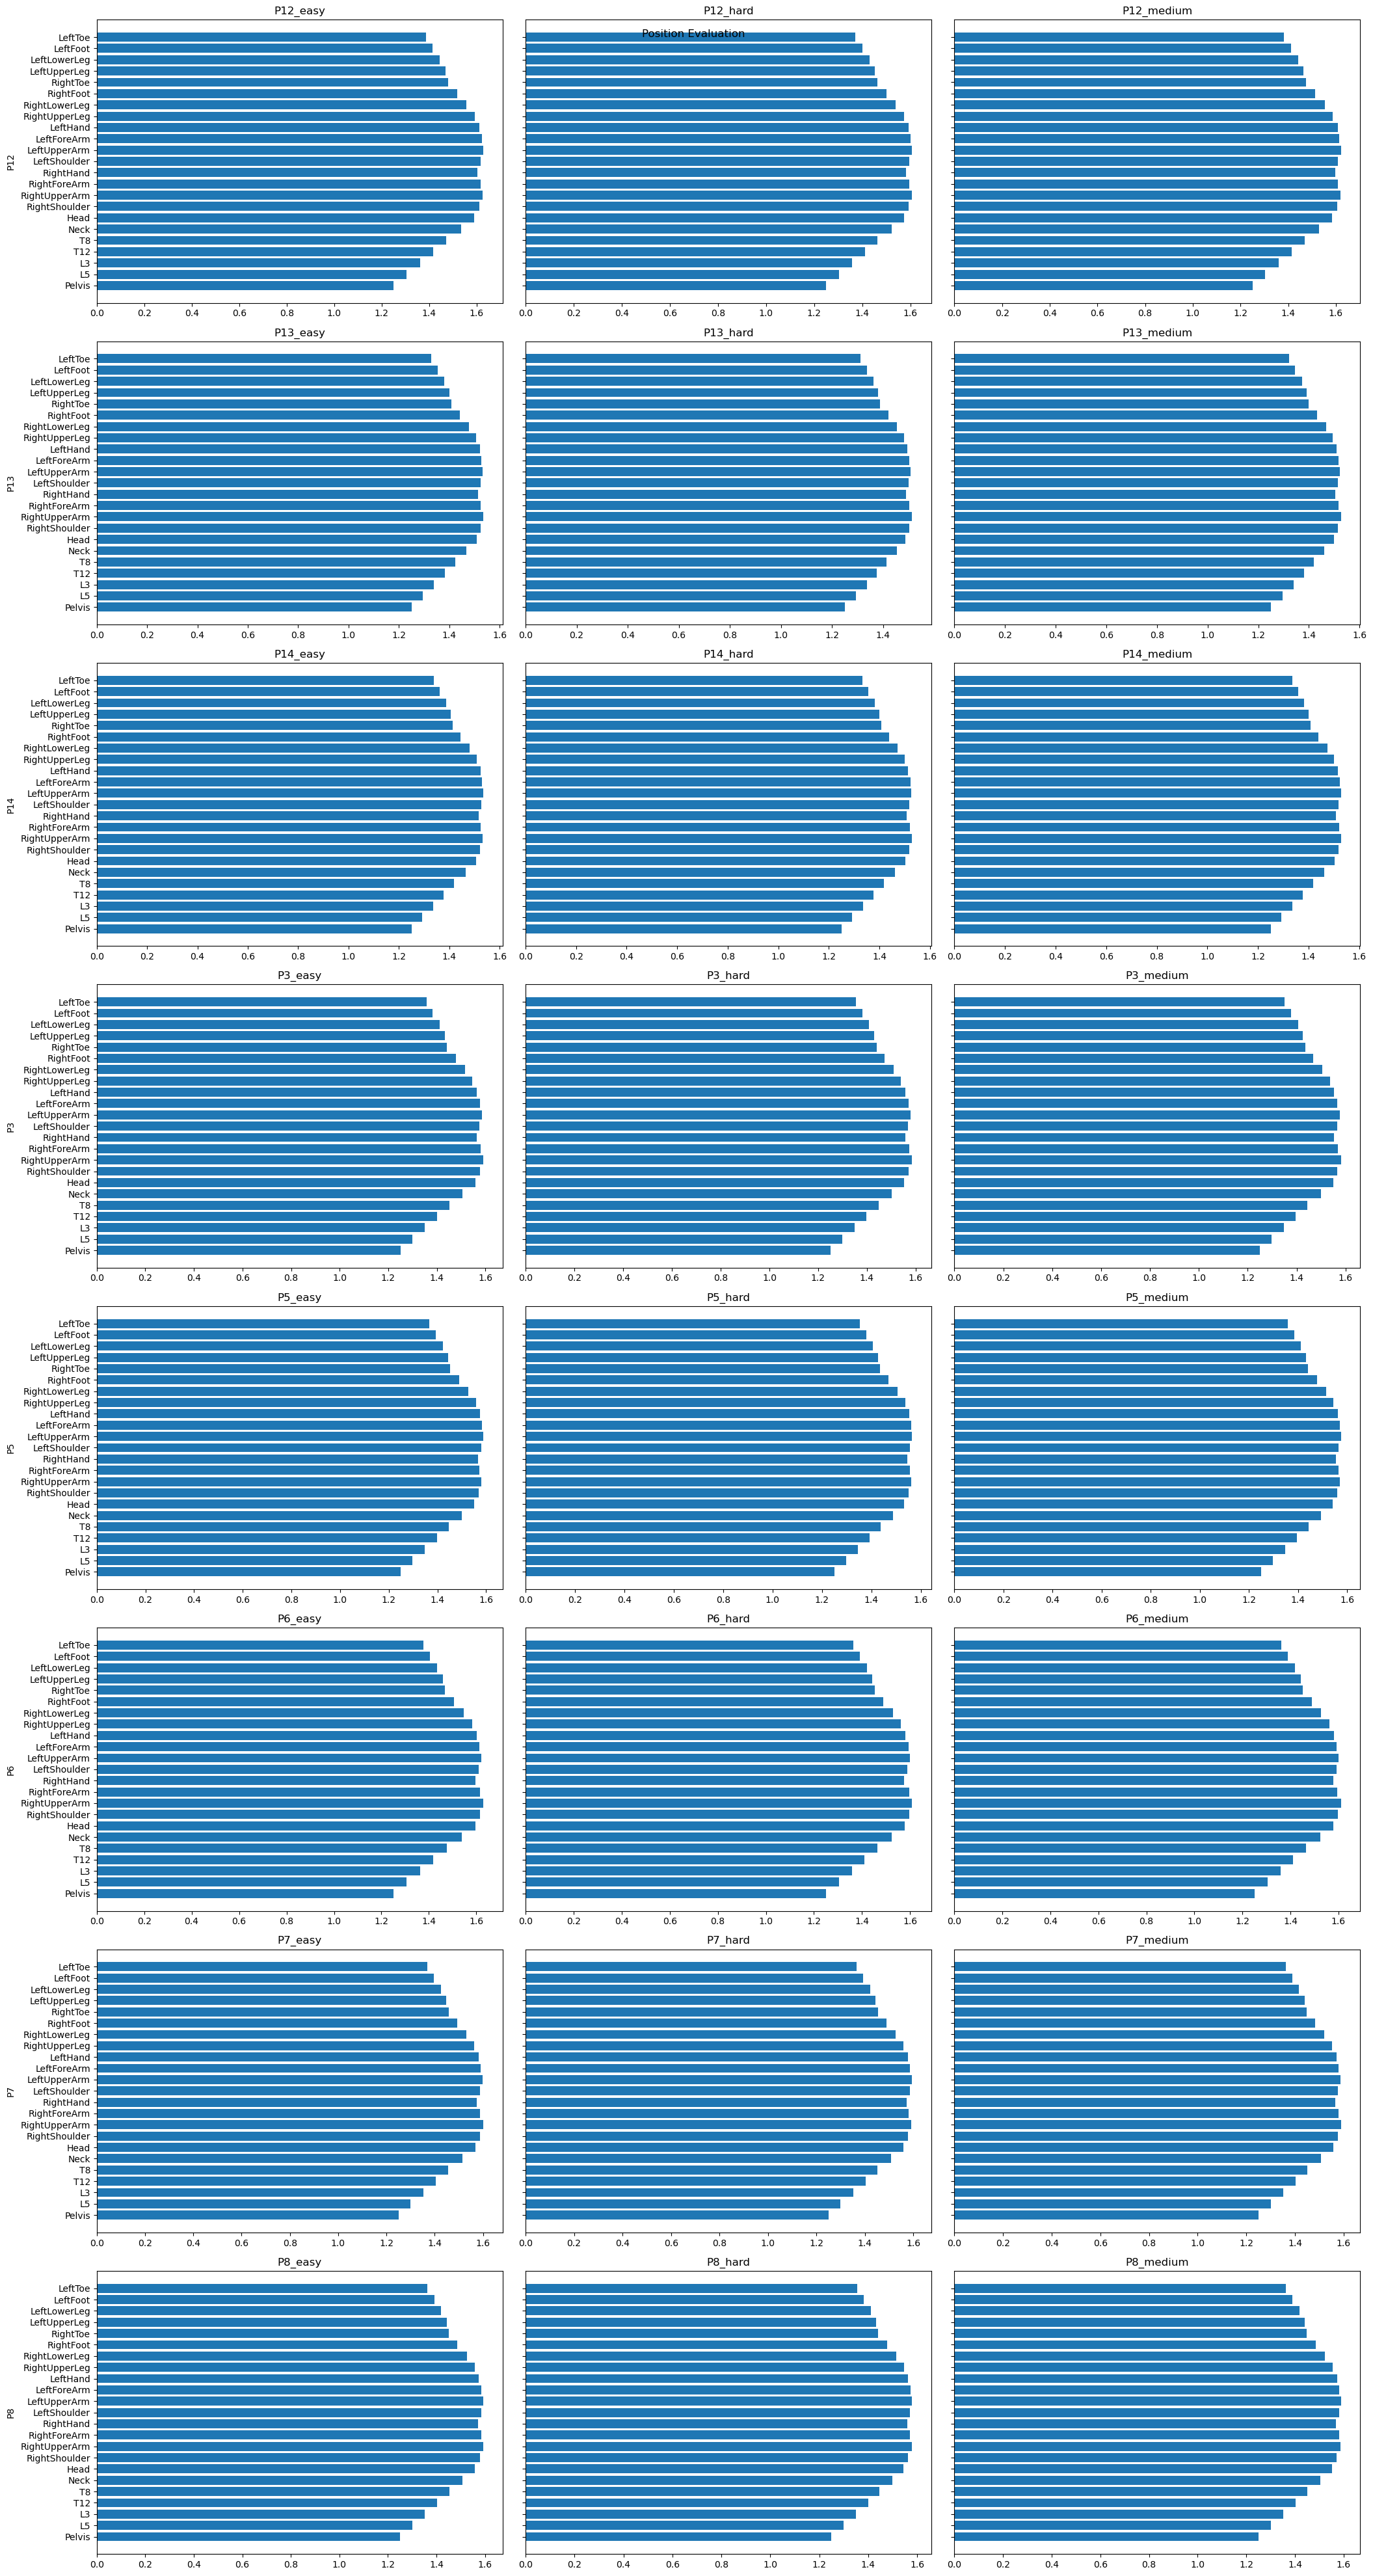

In [109]:
num_rows = len(px_folders)
num_cols = 3


fig, axs = plt.subplots(num_rows, num_cols, figsize=(21, 5*num_rows), sharey=True)
for i, folder_name in enumerate(px_folders):
    for j in range(num_cols):
        rms_pos_list = []
        pkl_folder = os.path.join(data_folder, folder_name, 'PKL')
        file_name = os.listdir(pkl_folder)[j]
        file_key = file_name.split('.')[0]
        for joint in joint_names:
            rms_pos_list.append(rms_pos_dict[file_key][joint])
        axs[i, j].barh(joint_names, rms_pos_list)
        axs[i, j].set_title(file_key)
    axs[i,0].set_ylabel(folder_name)
    axs[i,0].yaxis.set_label_coords(-0.2, 0.5)

# Hide any unused subplots
for i in range(num_rows):
    for j in range(num_cols, 3):
        axs[i, j].set_visible(False)

# Add a main title to the figure
fig.suptitle('Position Evaluation')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()



## Plot velocity

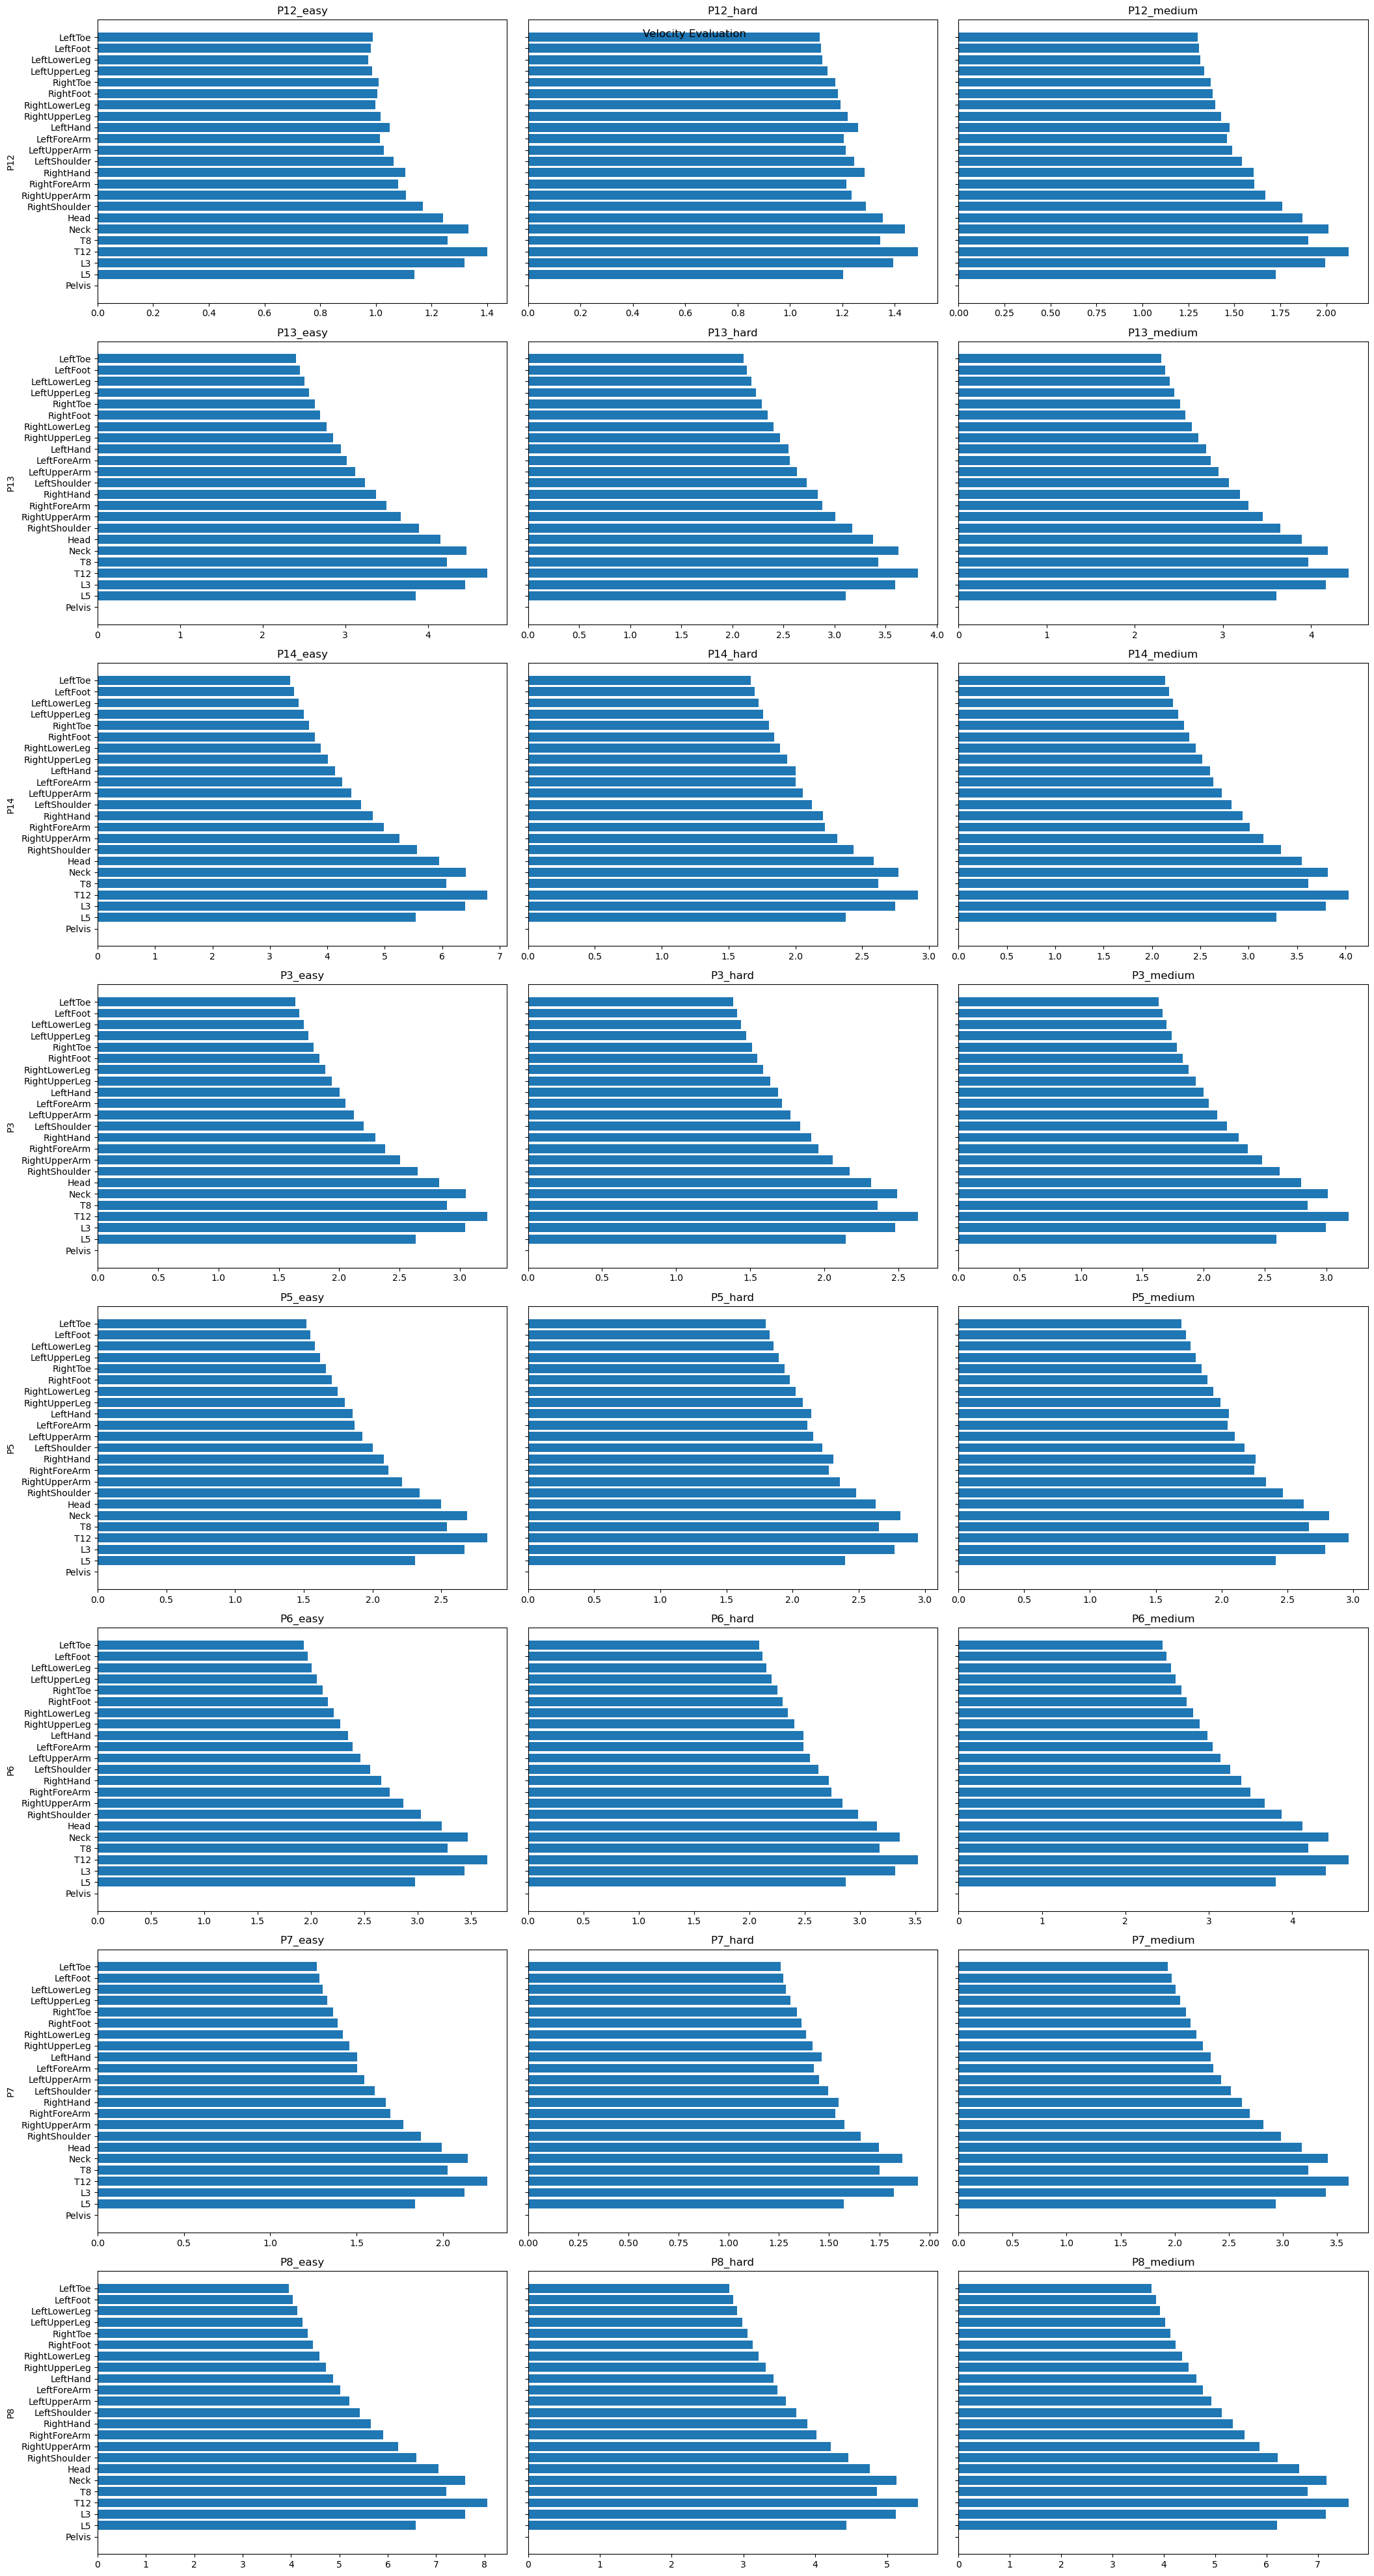

In [110]:
num_rows = len(px_folders)
num_cols = 3


fig, axs = plt.subplots(num_rows, num_cols, figsize=(21, 5*num_rows), sharey=True)
for i, folder_name in enumerate(px_folders):
    for j in range(num_cols):
        rms_vel_list = []
        pkl_folder = os.path.join(data_folder, folder_name, 'PKL')
        file_name = os.listdir(pkl_folder)[j]
        file_key = file_name.split('.')[0]
        for joint in joint_names:
            rms_vel_list.append(rms_vel_dict[file_key][joint])
        axs[i, j].barh(joint_names, rms_vel_list)
        axs[i, j].set_title(file_key)
    axs[i,0].set_ylabel(folder_name)
    axs[i,0].yaxis.set_label_coords(-0.2, 0.5)

# Hide any unused subplots
for i in range(num_rows):
    for j in range(num_cols, 3):
        axs[i, j].set_visible(False)

# Add a main title to the figure
fig.suptitle('Velocity Evaluation')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()



## Plot acceleration

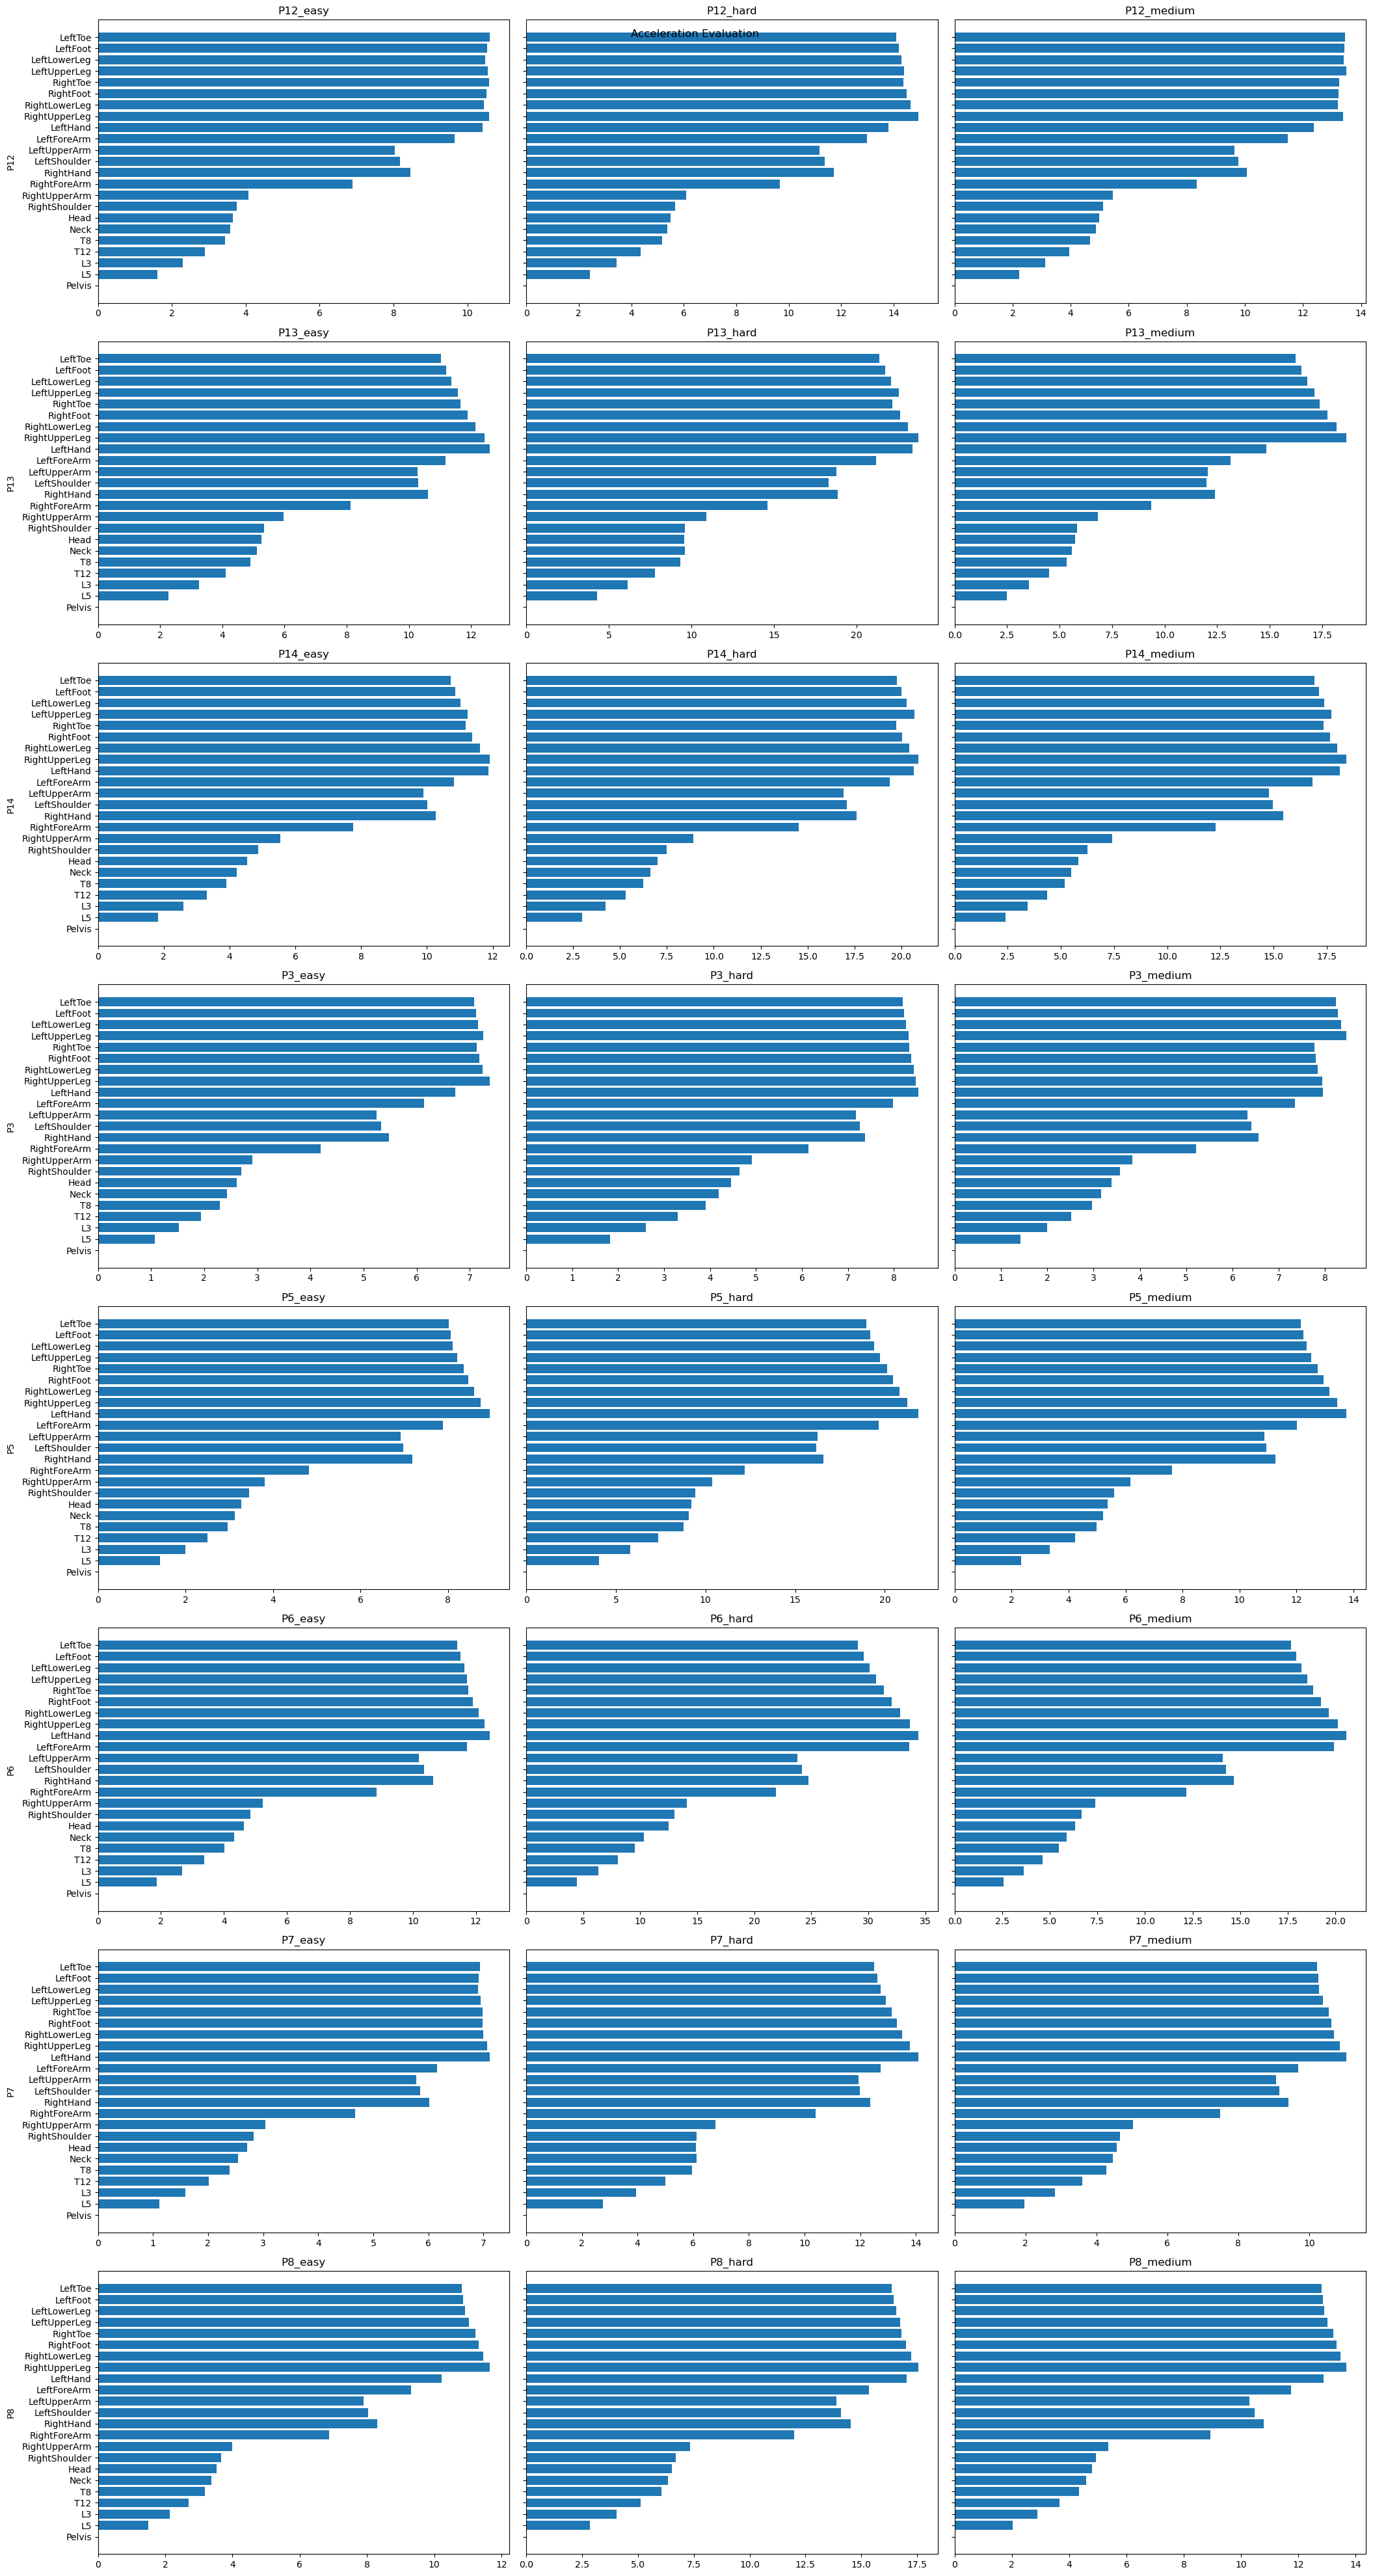

In [111]:
num_rows = len(px_folders)
num_cols = 3


fig, axs = plt.subplots(num_rows, num_cols, figsize=(21, 5*num_rows), sharey=True)
for i, folder_name in enumerate(px_folders):
    for j in range(num_cols):
        rms_acc_list = []
        pkl_folder = os.path.join(data_folder, folder_name, 'PKL')
        file_name = os.listdir(pkl_folder)[j]
        file_key = file_name.split('.')[0]
        for joint in joint_names:
            rms_acc_list.append(rms_acc_dict[file_key][joint])
        axs[i, j].barh(joint_names, rms_acc_list)
        axs[i, j].set_title(file_key)
    axs[i,0].set_ylabel(folder_name)
    axs[i,0].yaxis.set_label_coords(-0.2, 0.5)

# Hide any unused subplots
for i in range(num_rows):
    for j in range(num_cols, 3):
        axs[i, j].set_visible(False)

# Add a main title to the figure
fig.suptitle('Acceleration Evaluation')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()



## Plot jerk 

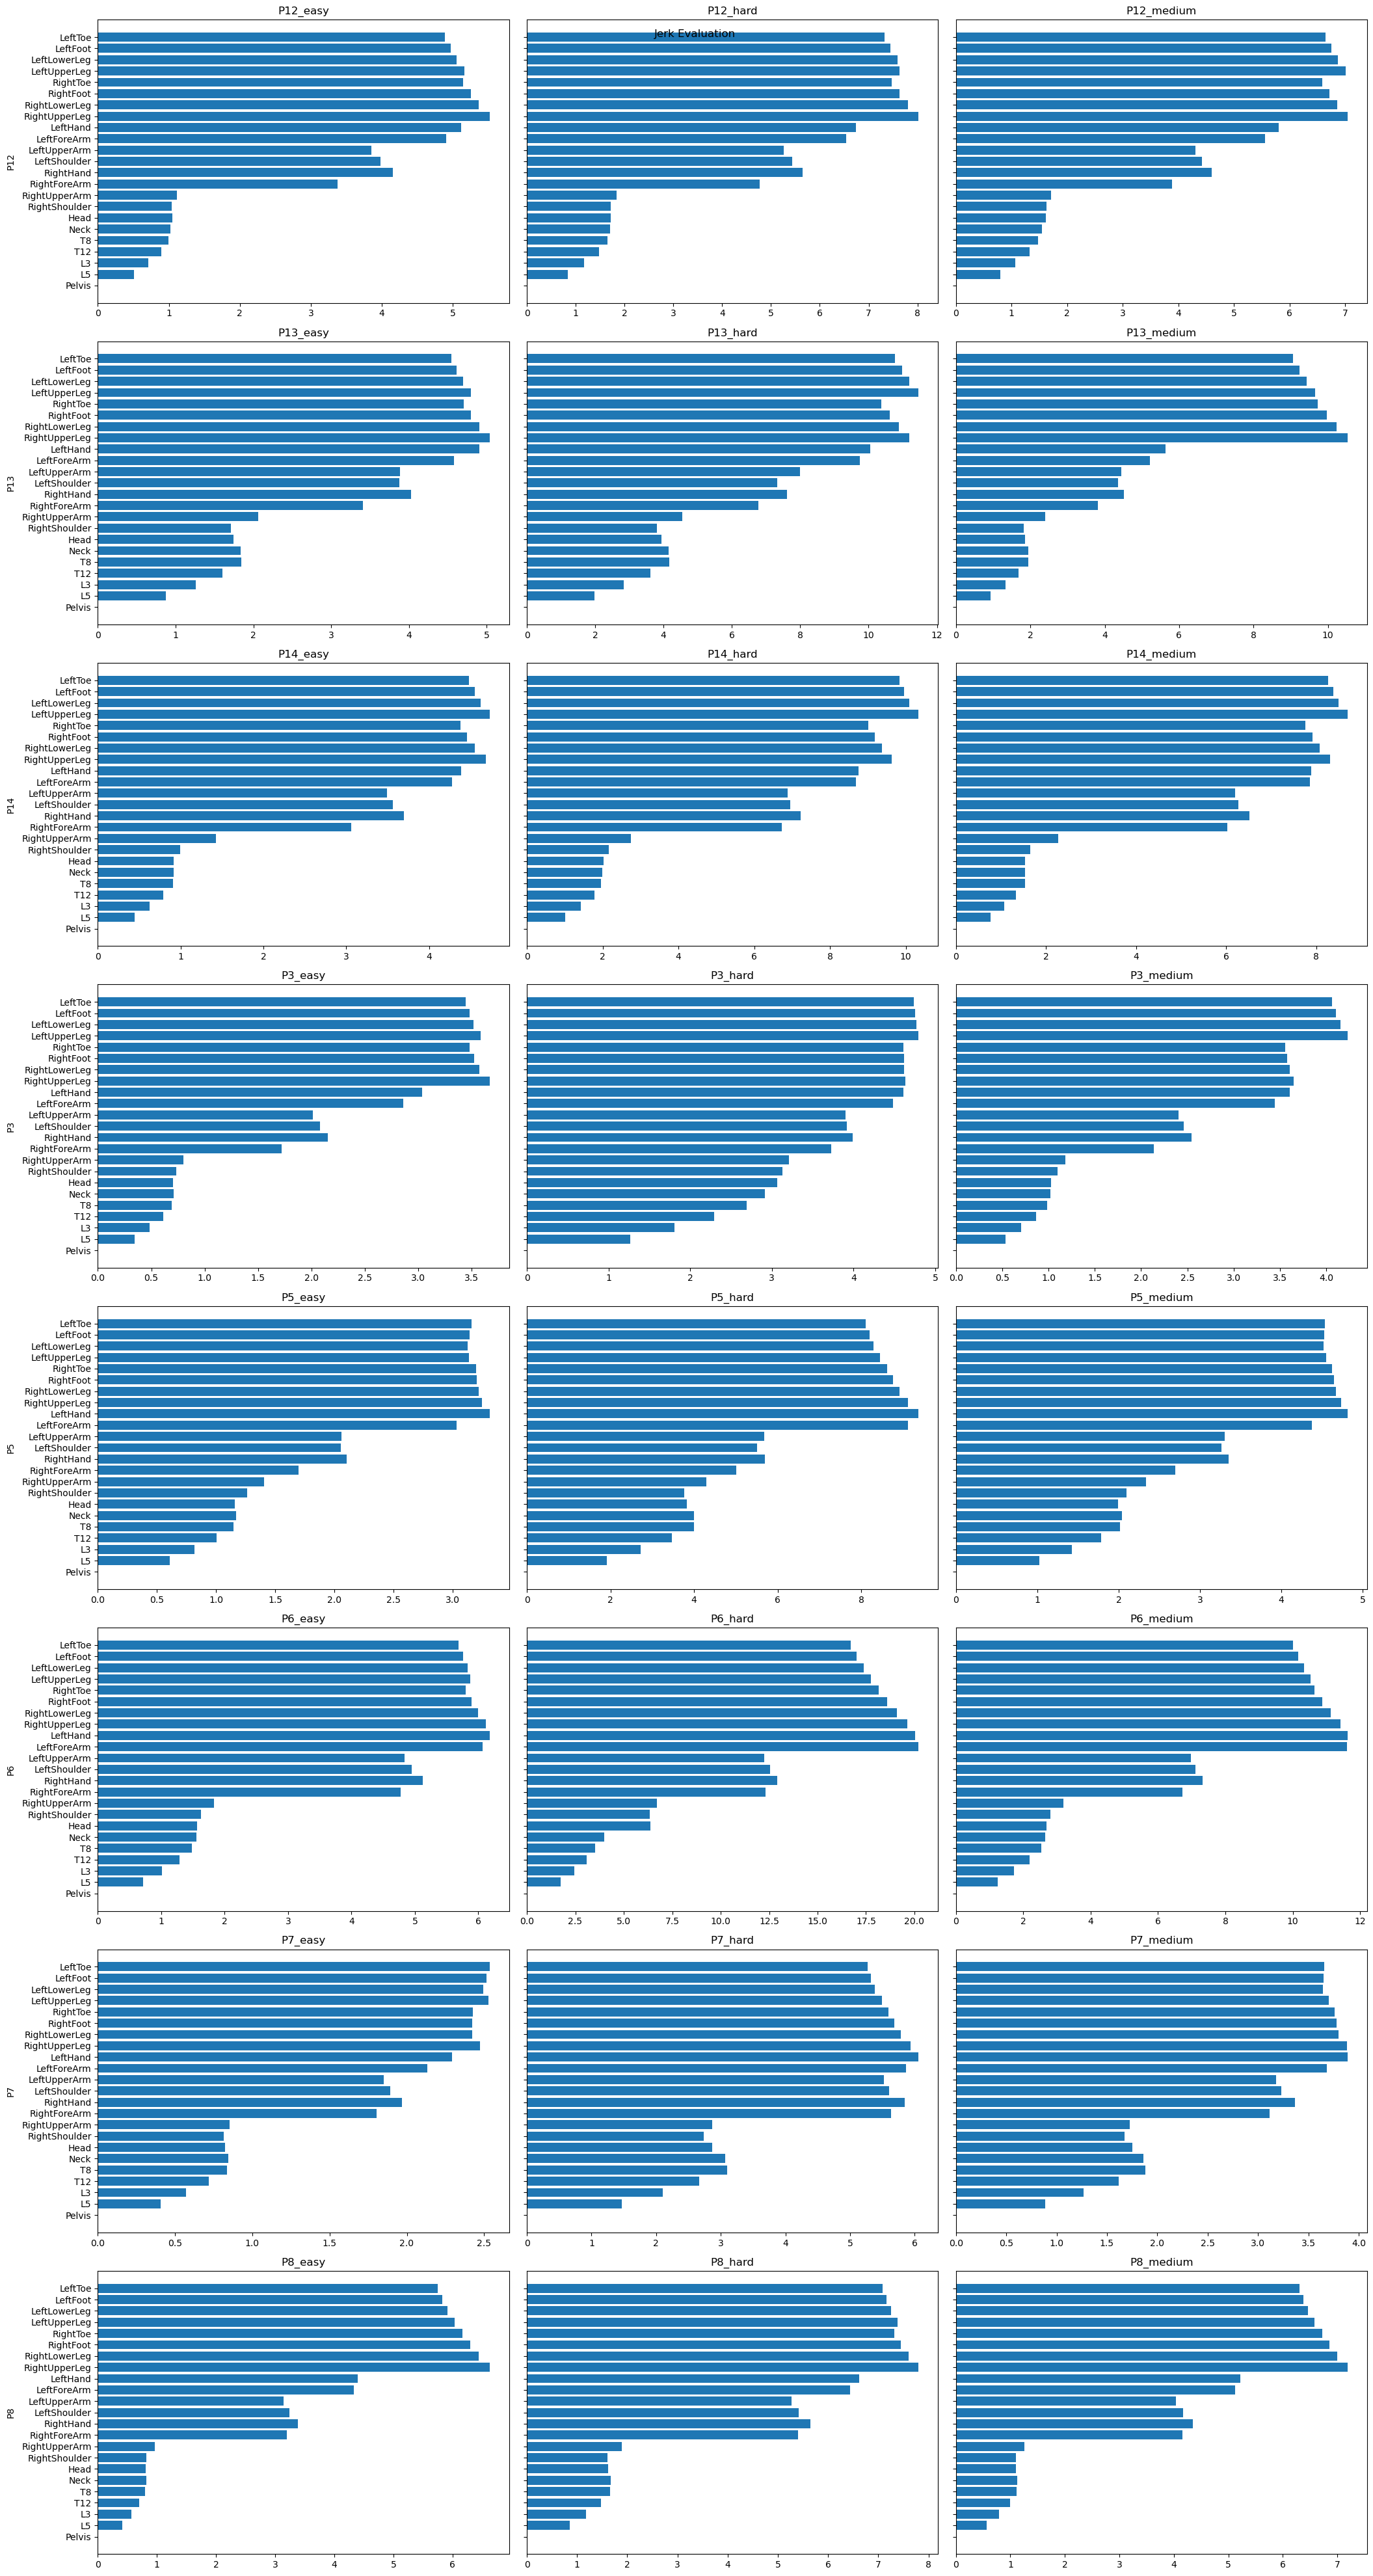

In [112]:
num_rows = len(px_folders)
num_cols = 3


fig, axs = plt.subplots(num_rows, num_cols, figsize=(21, 5*num_rows), sharey=True)
for i, folder_name in enumerate(px_folders):
    for j in range(num_cols):
        rms_jerk_list = []
        pkl_folder = os.path.join(data_folder, folder_name, 'PKL')
        file_name = os.listdir(pkl_folder)[j]
        file_key = file_name.split('.')[0]
        for joint in joint_names:
            rms_jerk_list.append(rms_jerk_dict[file_key][joint])
        axs[i, j].barh(joint_names, rms_jerk_list)
        axs[i, j].set_title(file_key)
    axs[i,0].set_ylabel(folder_name)
    axs[i,0].yaxis.set_label_coords(-0.2, 0.5)

# Hide any unused subplots
for i in range(num_rows):
    for j in range(num_cols, 3):
        axs[i, j].set_visible(False)

# Add a main title to the figure
fig.suptitle('Jerk Evaluation')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()



In [113]:
import pandas as pd

# Define a dictionary to store the data
data_dict = {'file_name': [], 'difficulty': []}
for joint_name in joint_names:
    data_dict['J' + joint_name] = []
    data_dict['P' + joint_name] = []
    data_dict['V' + joint_name] = []
    data_dict['A' + joint_name] = []

# Loop through the file names and add the data to the dictionary
for file_name in rms_jerk_dict.keys():
    difficulty = 0 if '_easy' in file_name else 1 if '_medium' in file_name else 2
    data_dict['file_name'].append(file_name)
    data_dict['difficulty'].append(difficulty)
    for joint_name in joint_names:
        data_dict['J' + joint_name].append(rms_jerk_dict[file_name][joint_name])
        data_dict['P' + joint_name].append(rms_pos_dict[file_name][joint_name])
        data_dict['V' + joint_name].append(rms_vel_dict[file_name][joint_name])
        data_dict['A' + joint_name].append(rms_acc_dict[file_name][joint_name])
# Create the DataFrame
df = pd.DataFrame(data_dict)


In [114]:
df['file_name'] = df['file_name'].str.split('_', expand=True)[0]
df['file_name'] = df['file_name'].str.split('P', expand=True)[1]
df['file_name'] = df['file_name'].astype(int)
df.head()

,file_name,difficulty,JPelvis,PPelvis,VPelvis,APelvis,JL5,PL5,VL5,AL5,...,VLeftLowerLeg,ALeftLowerLeg,JLeftFoot,PLeftFoot,VLeftFoot,ALeftFoot,JLeftToe,PLeftToe,VLeftToe,ALeftToe
0,12,0,0.00,1.25,0.00,0.00,0.51,1.30,1.14,1.62,...,0.97,10.48,4.97,1.41,0.98,10.54,4.89,1.39,0.99,10.60
1,12,2,0.00,1.25,0.00,0.00,0.84,1.30,1.20,2.42,...,1.12,14.29,7.45,1.40,1.12,14.19,7.33,1.37,1.11,14.11
2,12,1,0.00,1.25,0.00,0.00,0.80,1.30,1.73,2.22,...,1.31,13.40,6.76,1.41,1.31,13.42,6.65,1.38,1.30,13.44
3,13,0,0.00,1.25,0.00,0.00,0.88,1.30,3.85,2.27,...,2.51,11.37,4.62,1.35,2.45,11.19,4.55,1.33,2.40,11.03
4,13,2,0.00,1.25,0.00,0.00,1.98,1.30,3.11,4.31,...,2.19,22.11,10.98,1.34,2.14,21.74,10.78,1.31,2.11,21.39


In [115]:
peopledata = pd.read_csv('peopledata.csv', delimiter = ';')
peopledata.rename(columns = {'Unnamed: 0':'Subject'}, inplace = True)
peopledata.head(10)

,Subject,Age,Gender,Weight,Body height,body height incl shoe,shoe length,Ski length,Ski contact surface,Rotation point,Ski width,Pole length,Equipment comments,Level
0,3,38,M,64,175,177.40,29.00,205,190.00,94.50,4.50,133,classic ski,Beginner
1,5,23,F,50,164,167.00,28.70,183,176.00,87.00,4.60,147,skating ski,?
2,6,21,M,84,200,204.00,32.00,207,190.20,94.00,4.40,172,classic ski,Elite
3,7,30,F,68,172,175.00,27.00,195,183.00,92.00,5.00,145,skating ski with skin,Advance
4,8,27,F,68,171,174.00,27.00,197,190.00,92.00,4.50,143,skating ski with skin,?
5,12,33,M,100,183,186.00,30.00,194,180.00,92.00,4.70,162,classic ski,?
6,13,13,M,44,165,168.00,28.00,173,165.00,82.00,4.70,136,skating ski's,Intermediate
7,14,13,M,46,151,154.00,28.00,167,158.00,78.50,4.80,147,skating ski's,?


In [117]:
# assuming the DataFrame with file names is called 'df' and the DataFrame with people data is called 'peopledata'
merged_df = df.merge(peopledata, left_on='file_name', right_on='Subject', how='left')
merged_df

,file_name,difficulty,JPelvis,PPelvis,VPelvis,APelvis,JL5,PL5,VL5,AL5,...,Body height,body height incl shoe,shoe length,Ski length,Ski contact surface,Rotation point,Ski width,Pole length,Equipment comments,Level
0,12,0,0.00,1.25,0.00,0.00,0.51,1.30,1.14,1.62,...,183,186.00,30.00,194,180.00,92.00,4.70,162,classic ski,?
1,12,2,0.00,1.25,0.00,0.00,0.84,1.30,1.20,2.42,...,183,186.00,30.00,194,180.00,92.00,4.70,162,classic ski,?
2,12,1,0.00,1.25,0.00,0.00,0.80,1.30,1.73,2.22,...,183,186.00,30.00,194,180.00,92.00,4.70,162,classic ski,?
3,13,0,0.00,1.25,0.00,0.00,0.88,1.30,3.85,2.27,...,165,168.00,28.00,173,165.00,82.00,4.70,136,skating ski's,Intermediate
4,13,2,0.00,1.25,0.00,0.00,1.98,1.30,3.11,4.31,...,165,168.00,28.00,173,165.00,82.00,4.70,136,skating ski's,Intermediate
5,13,1,0.00,1.25,0.00,0.00,0.93,1.30,3.61,2.48,...,165,168.00,28.00,173,165.00,82.00,4.70,136,skating ski's,Intermediate
6,14,0,0.00,1.25,0.00,0.00,0.45,1.29,5.54,1.82,...,151,154.00,28.00,167,158.00,78.50,4.80,147,skating ski's,?
7,14,2,0.00,1.25,0.00,0.00,1.02,1.29,2.38,2.98,...,151,154.00,28.00,167,158.00,78.50,4.80,147,skating ski's,?
8,14,1,0.00,1.25,0.00,0.00,0.77,1.29,3.29,2.41,...,151,154.00,28.00,167,158.00,78.50,4.80,147,skating ski's,?
9,3,0,0.00,1.25,0.00,0.00,0.35,1.30,2.63,1.07,...,175,177.40,29.00,205,190.00,94.50,4.50,133,classic ski,Beginner


In [118]:
# Assuming the DataFrame with people data is called 'peopledata'
level_dict = {'Beginner': 0, 'Intermediate': 1, 'Advance': 2, 'Elite': 3}
merged_df['Level'] = merged_df['Level'].replace(level_dict)


merged_df.head()

,file_name,difficulty,JPelvis,PPelvis,VPelvis,APelvis,JL5,PL5,VL5,AL5,...,Body height,body height incl shoe,shoe length,Ski length,Ski contact surface,Rotation point,Ski width,Pole length,Equipment comments,Level
0,12,0,0.00,1.25,0.00,0.00,0.51,1.30,1.14,1.62,...,183,186.00,30.00,194,180.00,92.00,4.70,162,classic ski,?
1,12,2,0.00,1.25,0.00,0.00,0.84,1.30,1.20,2.42,...,183,186.00,30.00,194,180.00,92.00,4.70,162,classic ski,?
2,12,1,0.00,1.25,0.00,0.00,0.80,1.30,1.73,2.22,...,183,186.00,30.00,194,180.00,92.00,4.70,162,classic ski,?
3,13,0,0.00,1.25,0.00,0.00,0.88,1.30,3.85,2.27,...,165,168.00,28.00,173,165.00,82.00,4.70,136,skating ski's,1
4,13,2,0.00,1.25,0.00,0.00,1.98,1.30,3.11,4.31,...,165,168.00,28.00,173,165.00,82.00,4.70,136,skating ski's,1


In [119]:
X = merged_df.drop(['file_name', 'Level'], axis = 1)
y = merged_df['Level']

# Get dummy variables for Gender and Equipment Comments
gender_dummies = pd.get_dummies(X['Gender'], prefix='Gender')
equipment_dummies = pd.get_dummies(X['Equipment comments'], prefix='Equipment')

# Concatenate the dummy variables with the original DataFrame
X = pd.concat([X, gender_dummies, equipment_dummies], axis=1)
X = X.drop(['Gender', 'Equipment comments'], axis = 1)
X.head()

,difficulty,JPelvis,PPelvis,VPelvis,APelvis,JL5,PL5,VL5,AL5,JL3,...,Ski contact surface,Rotation point,Ski width,Pole length,Gender_F,Gender_M,Equipment_classic ski,Equipment_skating ski,Equipment_skating ski with skin,Equipment_skating ski's
0,0,0.00,1.25,0.00,0.00,0.51,1.30,1.14,1.62,0.71,...,180.00,92.00,4.70,162,0,1,1,0,0,0
1,2,0.00,1.25,0.00,0.00,0.84,1.30,1.20,2.42,1.17,...,180.00,92.00,4.70,162,0,1,1,0,0,0
2,1,0.00,1.25,0.00,0.00,0.80,1.30,1.73,2.22,1.07,...,180.00,92.00,4.70,162,0,1,1,0,0,0
3,0,0.00,1.25,0.00,0.00,0.88,1.30,3.85,2.27,1.26,...,165.00,82.00,4.70,136,0,1,0,0,0,1
4,2,0.00,1.25,0.00,0.00,1.98,1.30,3.11,4.31,2.84,...,165.00,82.00,4.70,136,0,1,0,0,0,1


In [120]:
import numpy as np
from sklearn.model_selection import train_test_split

# Get indices of non-missing target values
train_indices = np.where(y != '?')[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.iloc[train_indices], y.iloc[train_indices], test_size=0.2, random_state=42)

In [121]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and test the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_score = lr_model.score(X_test, y_test)

# Train and test the decision tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_score = dt_model.score(X_test, y_test)

# Train and test the random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_score = rf_model.score(X_test, y_test)

# Train and test the support vector machine model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_score = svm_model.score(X_test, y_test)

print(f"Logistic regression score: {lr_score}")
print(f"Decision tree score: {dt_score}")
print(f"Random forest score: {rf_score}")
print(f"SVM score: {svm_score}")


Logistic regression score: 0.3333333333333333
Decision tree score: 0.0
Random forest score: 0.3333333333333333
SVM score: 0.3333333333333333


In [123]:
unk_indices = np.where(y == '?')[0]
# Load the data
X_unknown = X.iloc[unk_indices]
# Scale the data
X_unknown_scaled = scaler.transform(X_unknown)
# Predict with logistic regression
lr_pred = lr_model.predict(X_unknown_scaled)
# Predict with decision tree
dt_pred = dt_model.predict(X_unknown_scaled)
# Predict with random forest
rf_pred = rf_model.predict(X_unknown_scaled)
# Predict with support vector machine
svm_pred = svm_model.predict(X_unknown_scaled)

# Print the predicted labels
print(f"Logistic regression predicted labels: {lr_pred}")
print(f"Decision tree predicted labels: {dt_pred}")
print(f"Random forest predicted labels: {rf_pred}")
print(f"SVM predicted labels: {svm_pred}")


Logistic regression predicted labels: [0 0 0 1 1 1 0 2 0 3 2 3]
Decision tree predicted labels: [0 0 0 2 0 1 0 0 0 3 1 2]
Random forest predicted labels: [0 3 3 1 1 1 0 1 0 0 1 3]
SVM predicted labels: [3 0 0 3 1 1 0 3 0 3 3 3]


In [130]:
result = merged_df[['file_name', 'Level']].iloc[unk_indices]
result['LR pred'] = lr_pred
result['DT pred'] = dt_pred
result['RF pred'] = rf_pred
result['SVM pred'] = svm_pred

result

,file_name,Level,LR pred,DT pred,RF pred,SVM pred
0,12,?,0,0,0,3
1,12,?,0,0,3,0
2,12,?,0,0,3,0
6,14,?,1,2,1,3
7,14,?,1,0,1,1
8,14,?,1,1,1,1
12,5,?,0,0,0,0
13,5,?,2,0,1,3
14,5,?,0,0,0,0
21,8,?,3,3,0,3
